# Telecom Customer Churn Prediction

### Source dataset

Dữ liệu được tải xuống từ Kaggle. Dưới đây là liên kết cho tập dữ liệu cùng với định nghĩa của các cột khác nhau được sử dụng trong dữ liệu.

https://www.kaggle.com/blastchar/telco-customer-churn

### Importing the libraries

In [1]:
import numpy as np
import seaborn as sns
import sklearn
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Telco Customer Churn.csv")

### Reading the first 5 rows

Đầu tiên ta sẽ khám phá 5 hàng đầu tiên của DataFrame của để hiểu dữ liệu các cột ta sẽ làm việc .

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Sử dụng 'describe' sẽ nhận được các giá trị cho các cột số như giá trị trung bình, độ lệch chuẩn, giá trị tối thiểu và các giá trị 1st, 2nd, 3rd và giá trị tối đa.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### Missingno 

Missingno là một thư viện hữu ích để vẽ các giá trị bị thiếu trong DataFrame. Nếu có bất kỳ giá trị bị thiếu nào trong dữ liệu chúng ta sẽ nhận được đầu ra cho cột cụ thể đó với các sọc trắng cho thấy sự hiện diện của giá trị bị thiếu.

<AxesSubplot:>

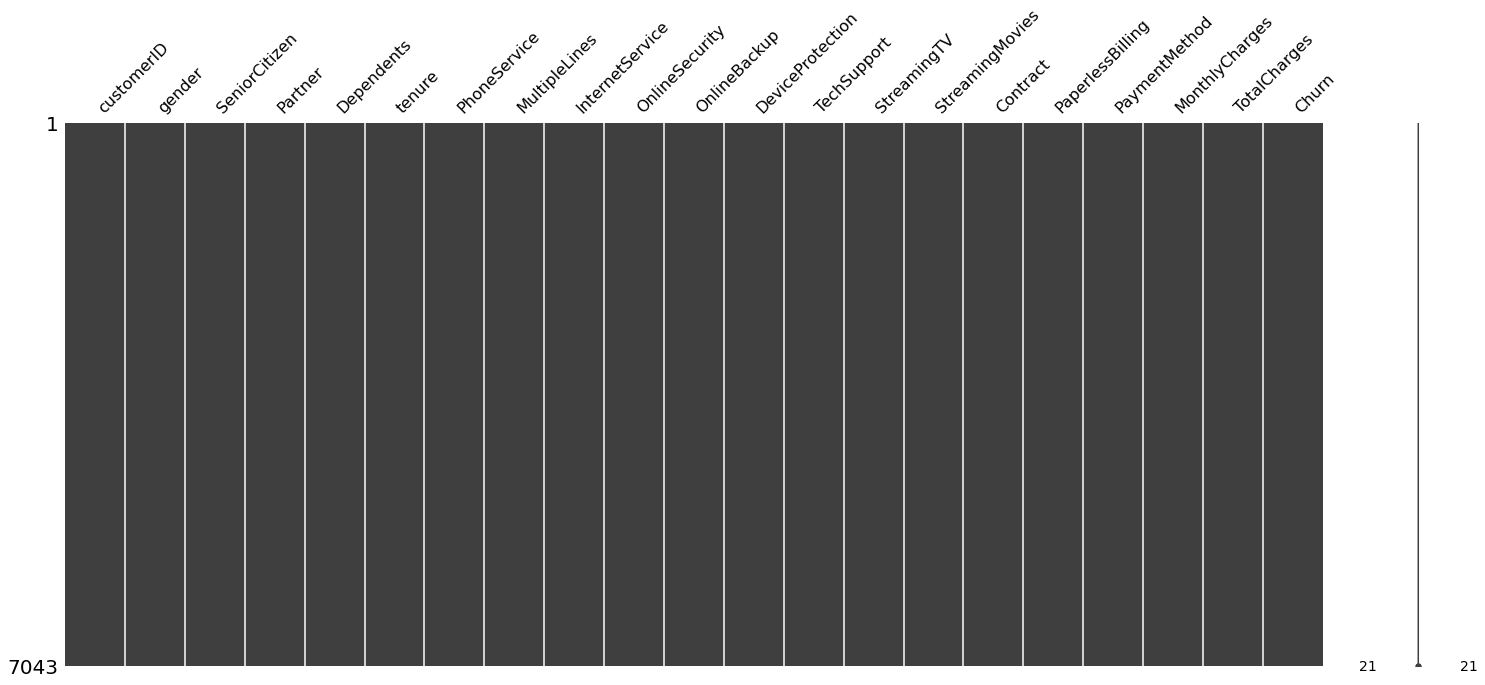

In [5]:
msno.matrix(df)

### Quan sát: 

Ta thấy rằng không có giá trị thiếu trong column. Do đó, chúng ta có thể bắt đầu xử lý dữ liệu và hiểu nó.

In [6]:
print("The shape of the dataframe is: {}".format(df.shape))

The shape of the dataframe is: (7043, 21)


### Quan sát: 

Chúng ta hiện đang làm việc với khoảng 7043 khách hàng với nhiều thuộc tính như giới tính của họ và liệu họ có phải là senior citizen hay không. Có nhiều thuộc tính khác mà chúng ta có thể xem xét.

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

liệt kê các cột mà chúng tôi sẽ làm việc trong bộ dữ liệu.

In [8]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df['SeniorCitizen'].unique()

array([0, 1])

In [10]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
## Palette values trong seaborn

palette_values = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r',
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 
 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
 'Wistia','Wistia_r','YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r', 
 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight',
 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

## Gender Countplot 

In [13]:
def countplot_function(dataframe, column, figsize = (15, 10), palette = "viridis"):
    plt.figure(figsize = figsize)
    sns.countplot(dataframe[column], palette = palette)
    plt.title("{} countplot".format(column), fontsize = 15)
    plt.xlabel("{}".format(column), fontsize = 10)

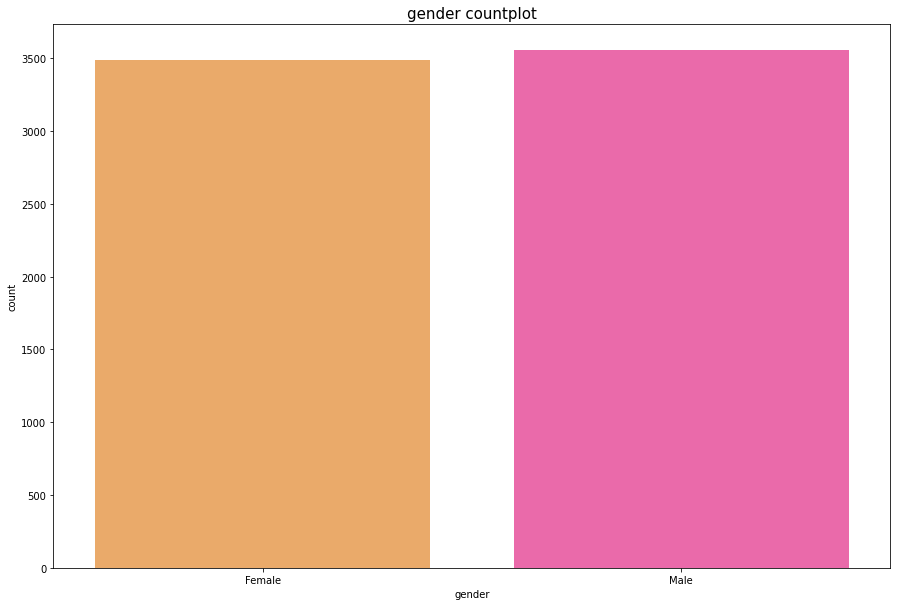

In [14]:
countplot_function(dataframe = df, column = 'gender', palette = random.choice(palette_values))
plt.show()

## Quan sát: 

1. Ta thấy rằng có số lượng nam và nữ bằng nhau trong dữ liệu.
2. Do đó, 2 nhóm được đại diện như nhau để hiểu hành vi tổng thể của họ đối với Telco.

## Partner Countplot

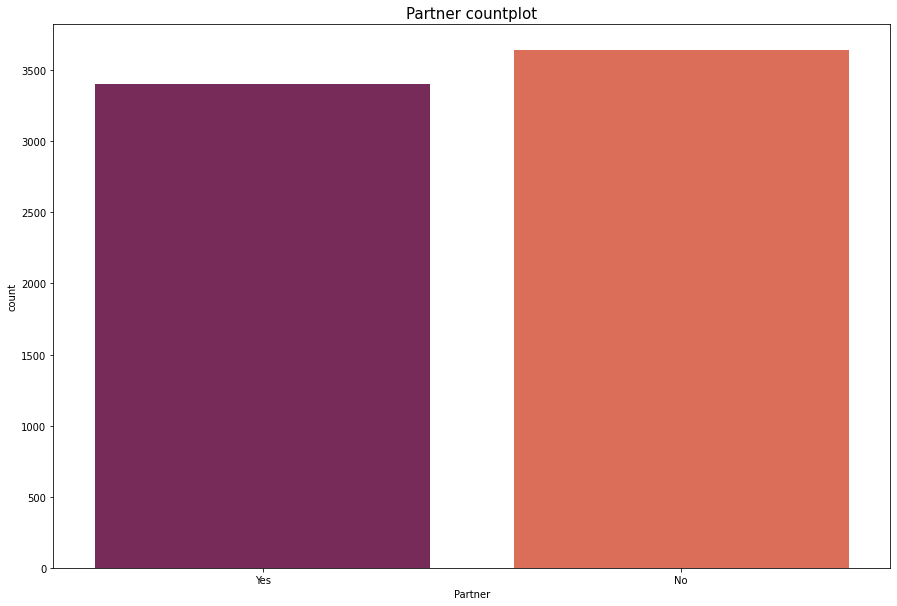

In [15]:
countplot_function(dataframe = df, column = "Partner", palette = random.choice(palette_values))
plt.show()

## Quan sát:
1. Có nhiều người không có đối tác so với những người có đối tác. 
2. Vì chúng ta có nhiều dữ liệu hơn cho những người không có đối tác, chúng tôi sẽ có thể dự đoán hành vi của họ và xác định xem họ có rời khỏi dịch vụ telco hay không.

## InternetService Countplot

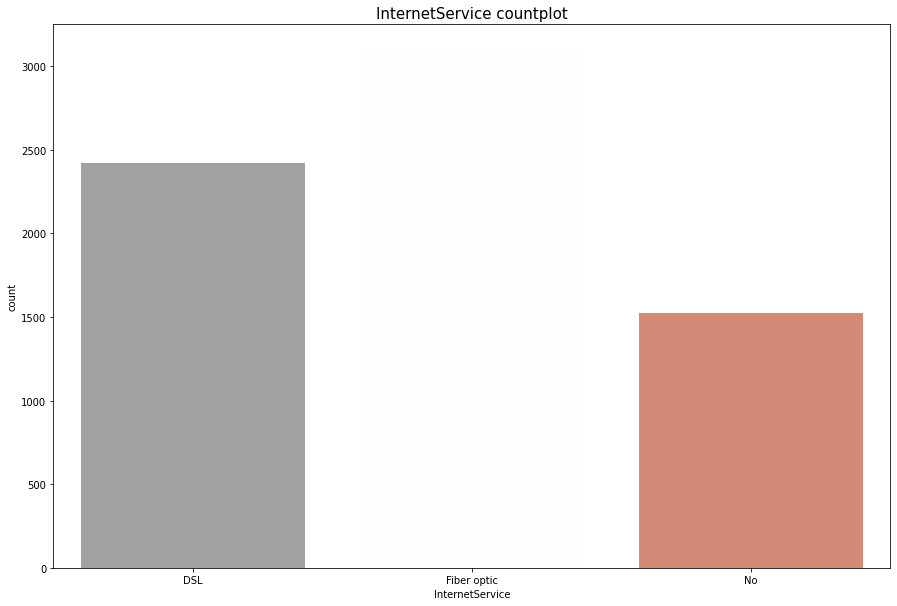

In [16]:
countplot_function(dataframe = df, column = "InternetService", palette = random.choice(palette_values))
plt.show()

## Quan sát:

1. Có thể thấy rằng hầu hết các dịch vụ Telco là dịch vụ cáp quang (Fiber Optic) vì tùy chọn này đang trở nên phổ biến giữa các khách hàng.
2. Dữ liệu phản ánh các xu hướng mới nhất vì hầu hết mọi người chọn dịch vụ cáp quang so với các dịch vụ DSL.

## OnlineBackup Countplot

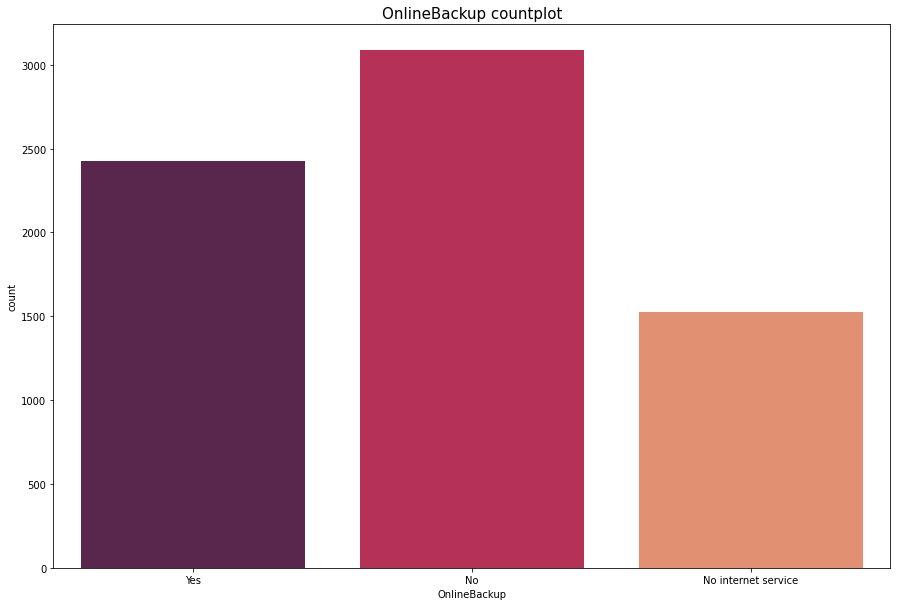

In [17]:
countplot_function(dataframe = df, column = "OnlineBackup", palette = random.choice(palette_values))
plt.show()

## Quan sát: 
1. Hầu hết mọi người trong dữ liệu không thích các dịch vụ sao lưu trực tuyến (Online Backup Services) được hiển thị trong hình trên.
2. Có khá nhiều người không có dịch vụ Internet.
3. Do đó, ta cũng nên xem xét liệu một người có dịch vụ internet hay không trước khi xác định liệu họ có thích sao lưu trực tuyến hay không.

## PaymentMethod Countplot

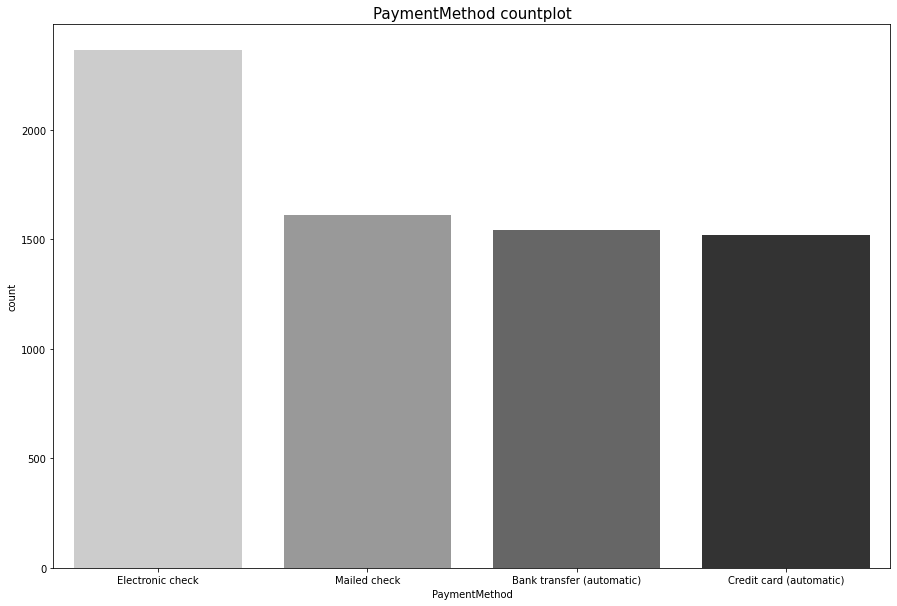

In [18]:
countplot_function(dataframe = df, column = "PaymentMethod", palette = random.choice(palette_values))
plt.show()

## Quan sát: 
1.  Một phần lớn người dùng từ Telco thích Electronic Check so với các tùy chọn khác. 
2. Có những tùy chọn khác phổ biến trong các khách hàng như Mailed check, chuyển khoản ngân hàng (tự động) và thẻ tín dụng (tự động).
3. Do đó, chúng ta sẽ có thể dự đoán chính xác hơn hành vi của khách hàng sử dụng phương thức thanh toán Electronic Check so với các phương pháp khác.

## Contract Countplot

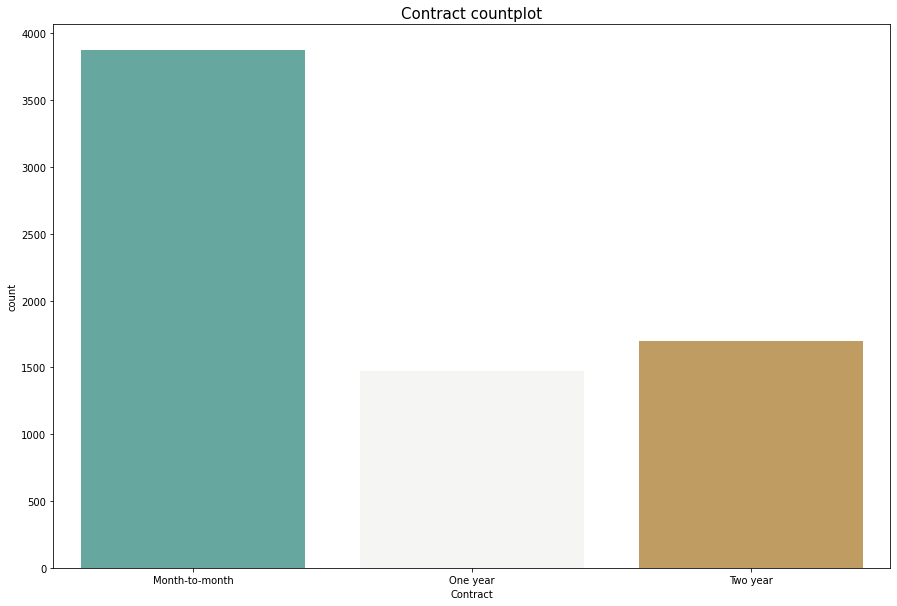

In [19]:
countplot_function(dataframe = df, column = "Contract", palette = random.choice(palette_values))
plt.show()

## Quan sát:

1. Dữ liệu hợp đồng phần lớn là hàng tháng (month-to-month) so với hợp đồng một năm và hai năm (one-year và two-year)
2. Điều này cũng đúng trong cuộc sống thực bởi vì hầu hết khách hàng thích gắn bó với hợp đồng hàng tháng hơn là ở lại với cùng một dịch vụ trong một thời gian dài.
3. Do đó, ta thấy rằng dữ liệu này khá phản ánh thế giới thực.

## Churn Countplot

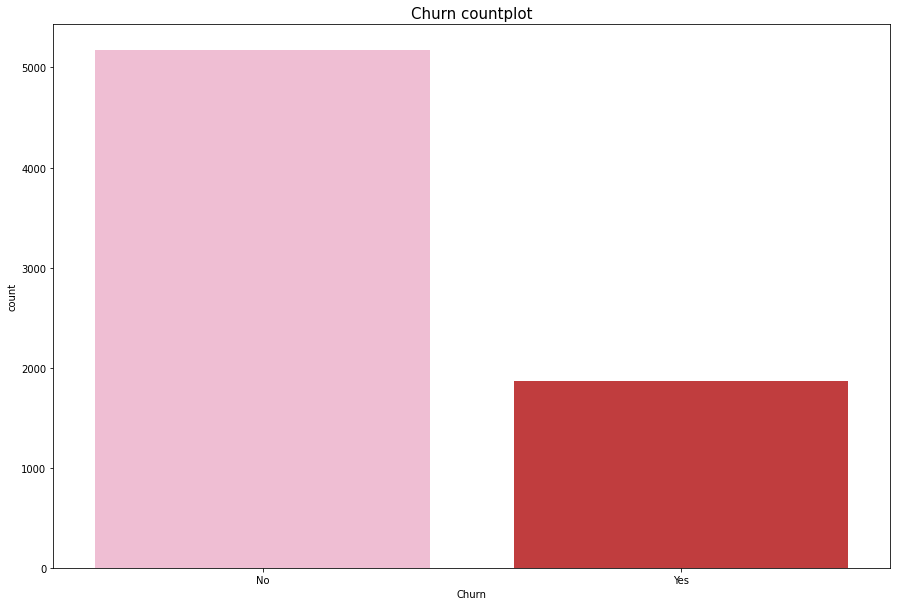

In [20]:
countplot_function(dataframe = df, column = "Churn", palette = random.choice(palette_values))
plt.show()

## Quan sát: 

1. Một phần lớn khách hàng đã không rời khỏi dịch vụ. 
2. Ta cũng thấy rằng có một vài khách hàng rời khỏi dịch vụ. Chúng ta thấy rằng không có sự khác biệt áp đảo giữa số lượng khách hàng ở lại dịch vụ so với khách hàng đã rời bỏ .

In [21]:
def boxplot_function(dataframe, x_value, y_value, title_size = 15, label_size = 10, figsize = (15, 10), palette = "viridis"):
    plt.figure(figsize = (figsize))
    sns.boxplot(x = x_value, y = y_value, data = dataframe, palette = palette)
    plt.xlabel("{} Value".format(x_value), fontsize = label_size)
    plt.ylabel("{} Value".format(y_value), fontsize = label_size)
    plt.title("{} Vs. {} Boxplot".format(x_value, y_value), fontsize = title_size)

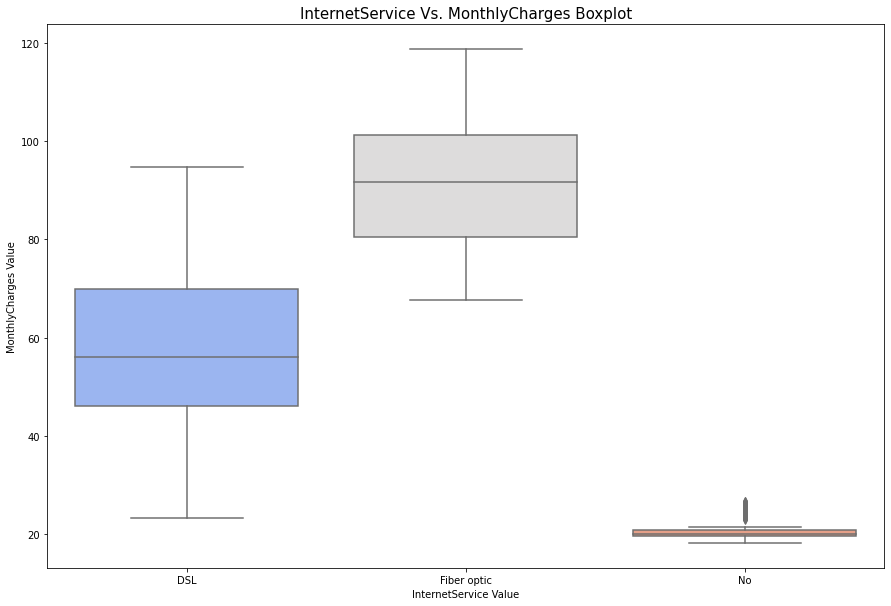

In [22]:
boxplot_function(dataframe = df, x_value = "InternetService", y_value = "MonthlyCharges", palette = "coolwarm")
plt.show()

## Quan sát:
1. Có thể dễ dàng nhìn thấy từ box plots rằng những người đã chọn dịch vụ 'Fiber optic' (cáp quang) có phí hàng tháng cao hơn.
2. Những người đã chọn dịch vụ 'DSL' có các khoản phí hàng tháng thấp hơn đáng kể như được hiển thị ở trên.
3. Như mong đợi, những khách hàng không đăng ký vào dịch vụ Internet có các khoản phí thấp như được hiển thị.

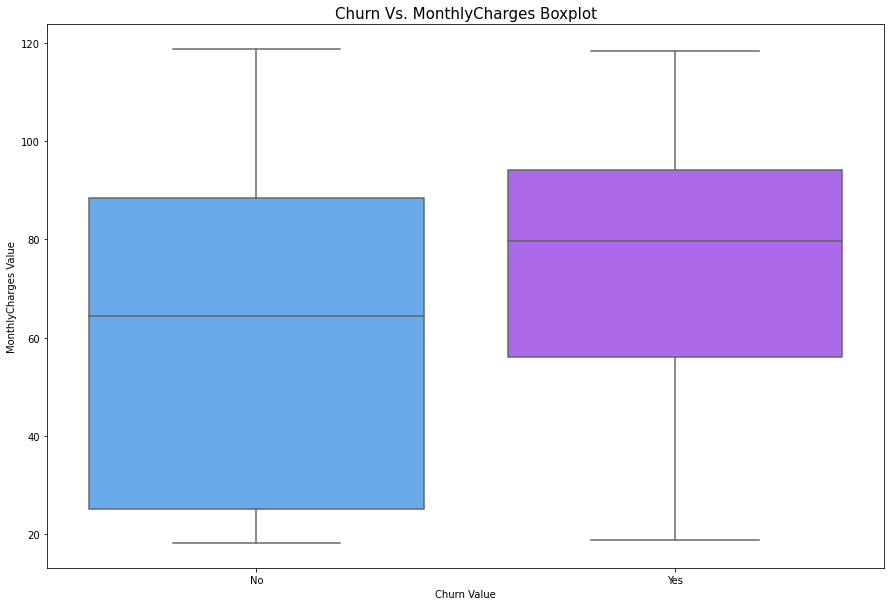

In [23]:
boxplot_function(dataframe = df, x_value = "Churn", y_value = "MonthlyCharges", palette = random.choice(palette_values))
plt.show()

## Quan sát:
1. Ta có thể nhìn thấy khi các khoản phí hàng tháng tăng lên, có khả năng cao hơn là khách hàng có xu hướng rời khỏi dịch vụ.
2. Những người không rời dịch vụ thường có phí hàng tháng thấp.
3. Do đó, Công ty Telco có thể hành động dựa trên các hình ở trên và giảm giá của các dịch vụ khác nhau vì điều này sẽ đảm bảo rằng hầu hết khách hàng có xu hướng ở lại dịch vụ.

In [24]:
## Thay thế giá trị bị thiếu bằng giá trị Median từ Total Charges.

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(np.nan, df['TotalCharges'].median()))

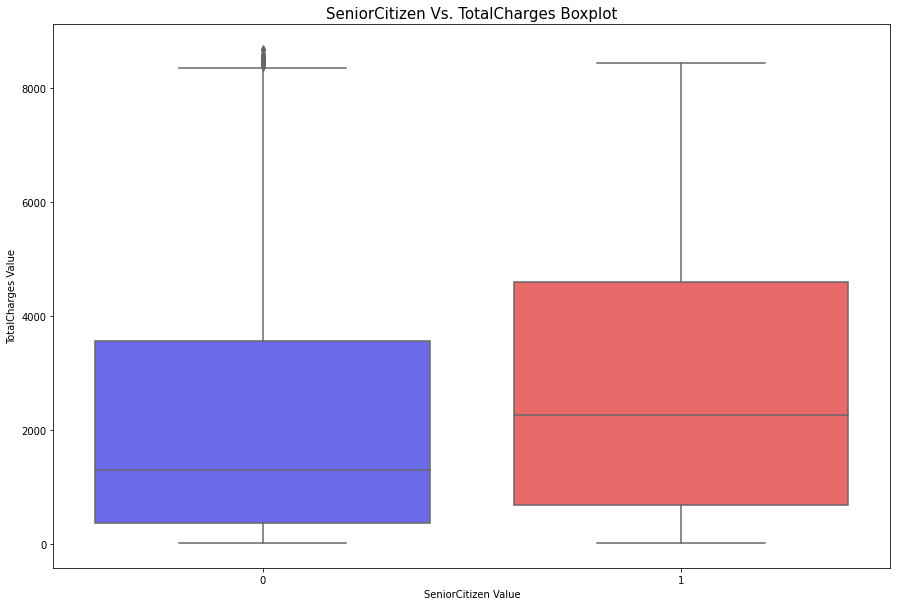

In [25]:
boxplot_function(dataframe = df, x_value = "SeniorCitizen", y_value = "TotalCharges", palette = random.choice(palette_values))
plt.show()

## Quan sát:
1. Dựa trên Boxplot ở trên, có thể thấy rằng liệu một người có phải là senior citizen hay không tác động đến tổng phí (Total Charges).
2. senior citizen thường khá giả và họ thường làm việc, điều đó có nghĩa là họ có thu nhập cao hơn.
3. Do đó, họ có thể chọn nhiều dịch vụ hơn từ Telco dẫn đến tổng phí cao hơn.

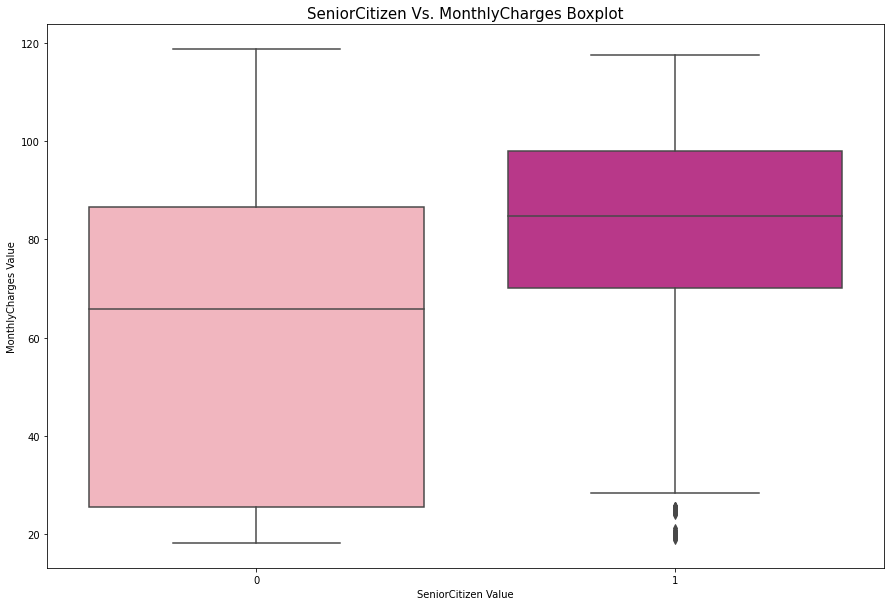

In [26]:
boxplot_function(dataframe = df, x_value = 'SeniorCitizen', y_value = 'MonthlyCharges', palette = random.choice(palette_values))

## Quan sát:
1. Phí hàng tháng cao hơn đáng kể đối với Senior Citizens so với những người không phải là Senior Citizens
2. Do đó, điều này khiến chúng ta tin rằng Senior Citizens có xu hướng bổ sung nhiều dịch vụ hơn từ Telco.
3. Do đó, Telco có thể hành động và cung cấp các dịch vụ thú vị hơn cho Senior Citizens so với những người không phải là Senior Citizens

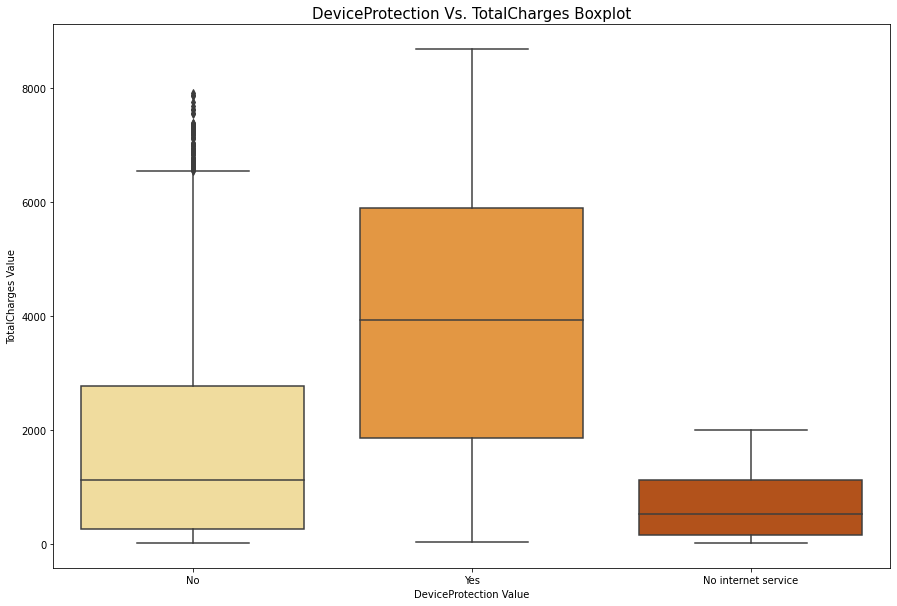

In [27]:
boxplot_function(dataframe = df, x_value = "DeviceProtection", y_value = "TotalCharges", palette = random.choice(palette_values))
plt.show()

## Quan sát:
1. Các kế hoạch bảo vệ thiết bị (Device Protection Plans) có chi phí rất cao như có thể thấy từ trên.
2. Điều này có nghĩa là mọi người đang trả rất nhiều cho các kế hoạch bảo vệ thiết bị.
3. Chúng ta đã thấy từ các ô trước đó rằng các khoản phí cao hơn, khách hàng càng nghiêng về rời khỏi dịch vụ telco.
4. Do đó, Telco có thể thực hiện các bước để giảm giá cho các kế hoạch bảo vệ thiết bị.

In [28]:
def barplot_function(dataframe, x_value, y_value, hue = None, title_size = 15, label_size = 10, figsize = (15, 10), palette = "viridis"):
    plt.figure(figsize = (figsize))
    sns.barplot(x = x_value, y = y_value, data = dataframe, hue = hue, palette = palette)
    plt.xlabel("{} Value".format(x_value), fontsize = label_size)
    plt.ylabel("{} Value".format(y_value), fontsize = label_size)
    plt.title("{} Vs. {} Boxplot".format(x_value, y_value), fontsize = title_size)

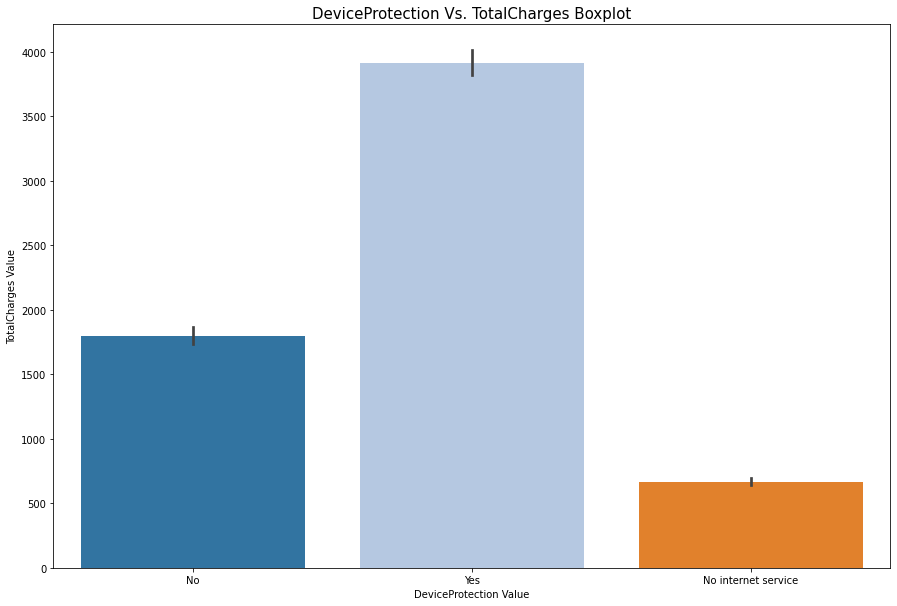

In [29]:
barplot_function(dataframe = df, x_value = 'DeviceProtection', y_value = 'TotalCharges', palette = random.choice(palette_values))
plt.show()

## Quan sát:
1. Đây là một cách khác để thể hiện các kế hoạch Device Projection và tổng phí.
2. Chúng ta đã vẽ Barplot đại diện cho tổng phí trung bình cho tất cả các khách hàng dựa trên các kế hoạch Device Projection.

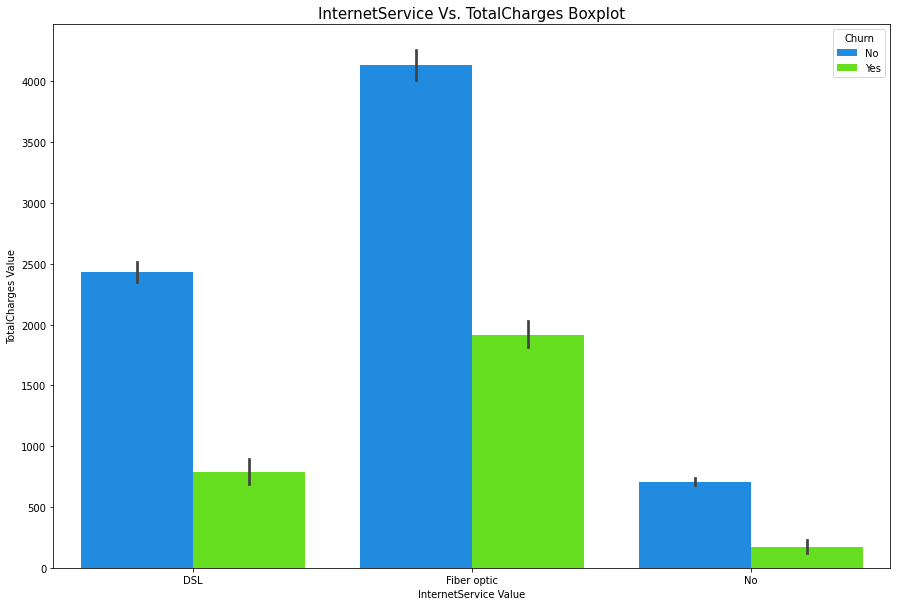

In [30]:
barplot_function(dataframe = df, x_value = 'InternetService', y_value = 'TotalCharges',
                 hue = 'Churn', palette = random.choice(palette_values))
plt.show()

## Quan sát:
1. Dựa trên hình vẽ này, ta thấy rằng một phần lớn khách hàng có tùy chọn cáp quang (Fiber) có xu hướng rời khỏi dịch vụ so với các dịch vụ Internet khác.
2. Do đó, Telco có thể xem xét những gì có thể là trường hợp tiềm năng cho khách hàng đã sử dụng tùy chọn cáp rời khỏi dịch vụ.
3. Nếu họ có thể đưa ra các chiến thuật phù hợp để cải thiện dịch vụ tùy chọn cáp của khách hàng, điều này đảm bảo rằng một phần lớn khách hàng được giữ lại.

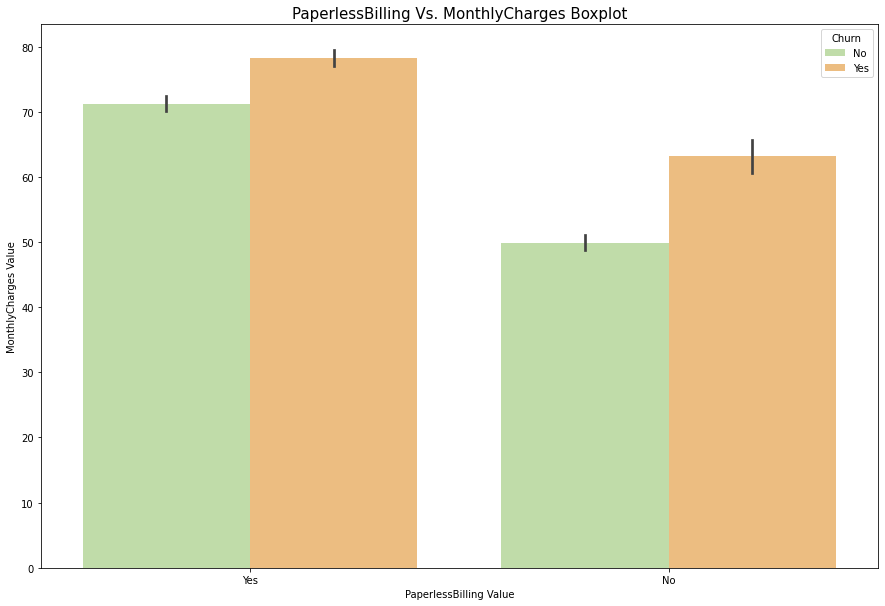

In [31]:
barplot_function(dataframe = df, x_value = 'PaperlessBilling', y_value = 'MonthlyCharges', hue = 'Churn', palette = random.choice(palette_values))
plt.show()

## Quan sát:
1. Khách hàng thanh toán không giấy tờ (Paperless billing) thường tận dụng quyền tự do sử dụng thẻ tín dụng/thẻ ghi nợ của họ và trả nhiều tiền hơn so với những người khác thích các tùy chọn thanh toán giấy.
2. Điều này là do sự thuận tiện hơn khi sử dụng thẻ tín dụng/thẻ ghi nợ để thực hiện giao dịch so với các dịch vụ khác.
3. Do đó, bất cứ khi nào một khách hàng mới sẽ đăng ký dịch vụ, Telco có thể xem xét được ước tính tổng số phí dựa trên việc khách hàng có chọn thanh toán không giấy tờ hay không.

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


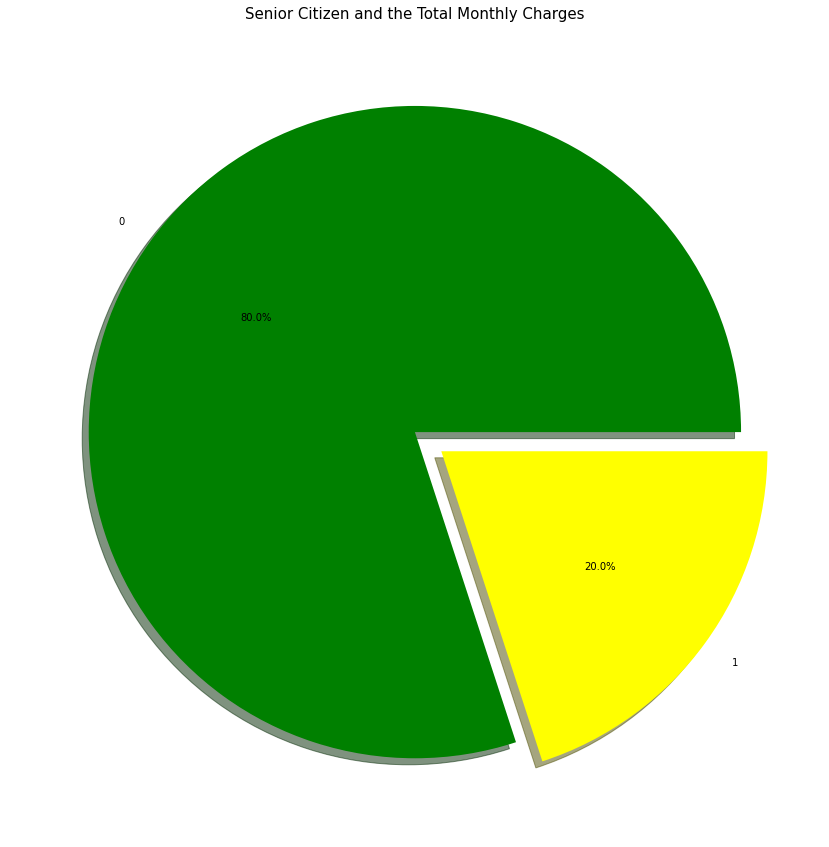

In [33]:
plt.figure(figsize = (15, 15))
plt.pie(x = df.groupby(by = 'SeniorCitizen').sum()['MonthlyCharges'], labels = df.groupby(by = 'SeniorCitizen').sum().index,
       explode = (0, 0.1), shadow = True,
       autopct = '%1.1f%%', colors = ['Green', 'Yellow'])
plt.title('Senior Citizen and the Total Monthly Charges', fontsize = 15)
plt.show()

## Quan sát:
1. Dựa trên hình, có thể thấy rằng SeniorCitizen trả ít tiền hơn so với những người không phải là SeniorCitizen trong hình.
2. Chúng ta đã lấy tổng số tiền của các khoản phí hàng tháng cho Senior Citizens bằng cách nhóm họ dựa trên các lớp của họ như thể hiện trong biểu đồ pie ở trên.

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df.groupby(by = 'PhoneService').sum()['MonthlyCharges']

PhoneService
No      28663.5
Yes    427453.1
Name: MonthlyCharges, dtype: float64

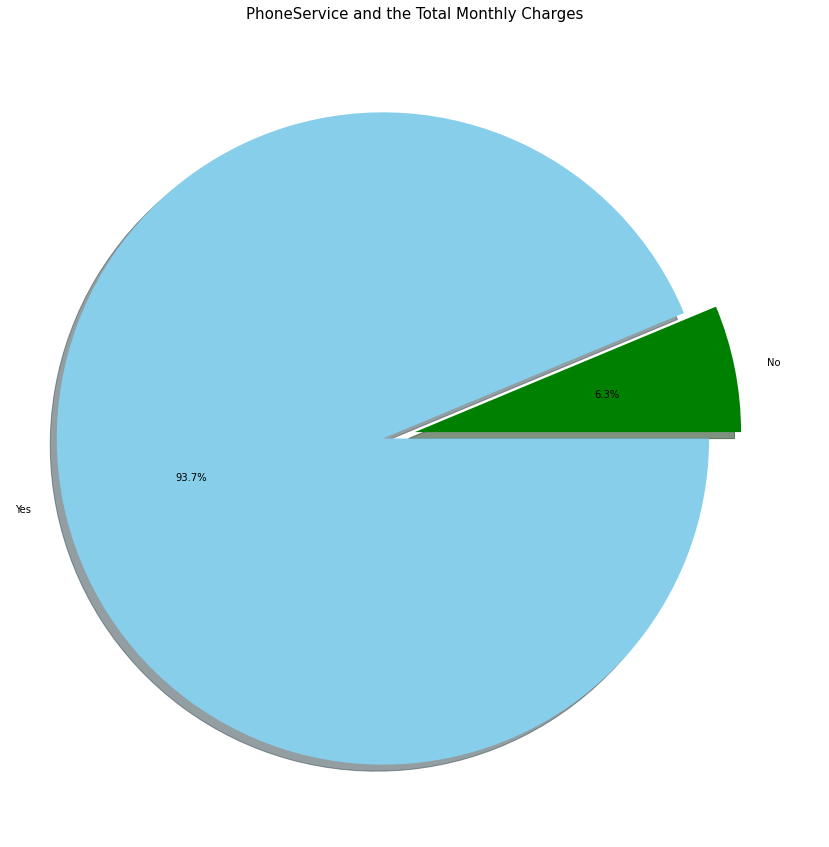

In [36]:
plt.figure(figsize = (15, 15))
plt.pie(x = df.groupby(by = 'PhoneService').sum()['MonthlyCharges'], labels = df.groupby(by = 'PhoneService').sum().index,
       explode = (0, 0.1), shadow = True,
       autopct = '%1.1f%%', colors = ['Green', 'SkyBlue'])
plt.title('PhoneService and the Total Monthly Charges', fontsize = 15)
#plt.savefig('Plots/PhoneService and Total Monthly Charges Pieplot.png')
plt.show()

## Quan sát:
1. Những người đã đăng ký vào dịch vụ điện thoại có số tiền được trả hàng tháng cao hơn đáng kể .
2. Những người không đăng ký vào dịch vụ điện thoại có số tiền được trả hàng tháng thấp hơn.

In [37]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
df.groupby(by = 'InternetService').sum()['MonthlyCharges']

InternetService
DSL            140665.35
Fiber optic    283284.40
No              32166.85
Name: MonthlyCharges, dtype: float64

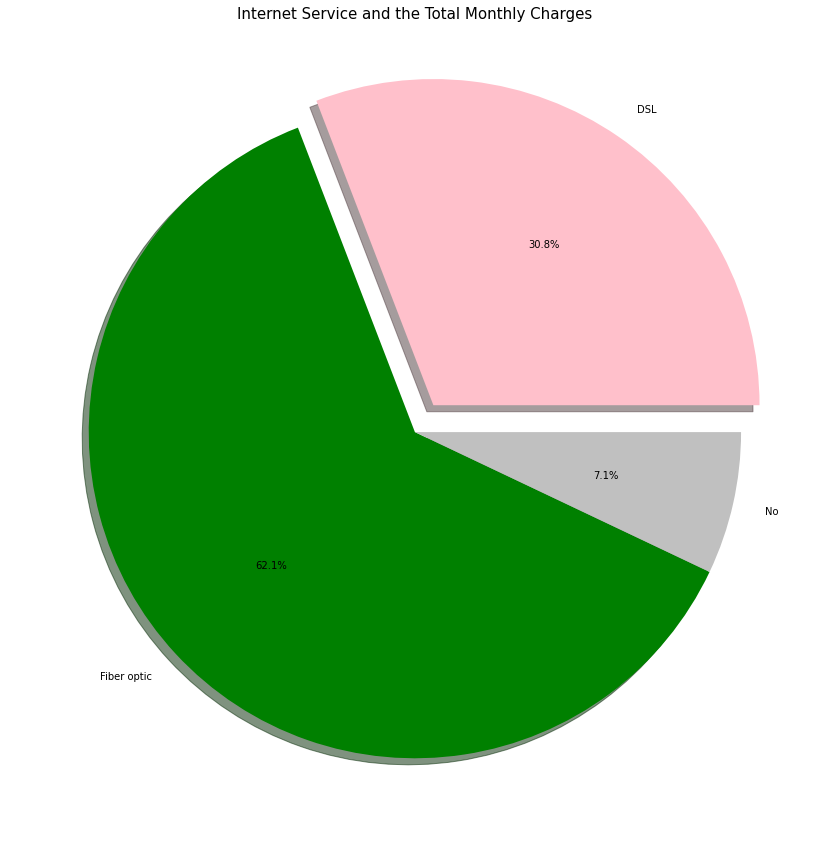

In [39]:
plt.figure(figsize = (15, 15))
plt.pie(x = df.groupby(by = 'InternetService').sum()['MonthlyCharges'], labels = df.groupby(by = 'InternetService').sum().index,
       explode = (0.1, 0, 0), shadow = True,
       autopct = '%1.1f%%', colors = ['Pink', 'Green', 'Silver'])
plt.title('Internet Service and the Total Monthly Charges', fontsize = 15)
plt.show()

## Quan sát:
1. Tổng các khoản phí cao hơn đáng kể đối với các khách hàng sử dụng cáp quang (Fiber optic) so với các tùy chọn khác như được chỉ ra trong hình được hiển thị ở trên.
2. Có những yếu tố khác cũng sẽ ảnh hưởng đến các khoản phí hàng tháng, từ đó sẽ ảnh hưởng đến việc khách hàng có rời khỏi dịch vụ hay không.

Loại bỏ tính năng không có ý nghĩa là customerID.

In [40]:
dataset = df.copy()
dataset = dataset.drop(columns = ['customerID'])
dataset = pd.get_dummies(dataset, drop_first = True)

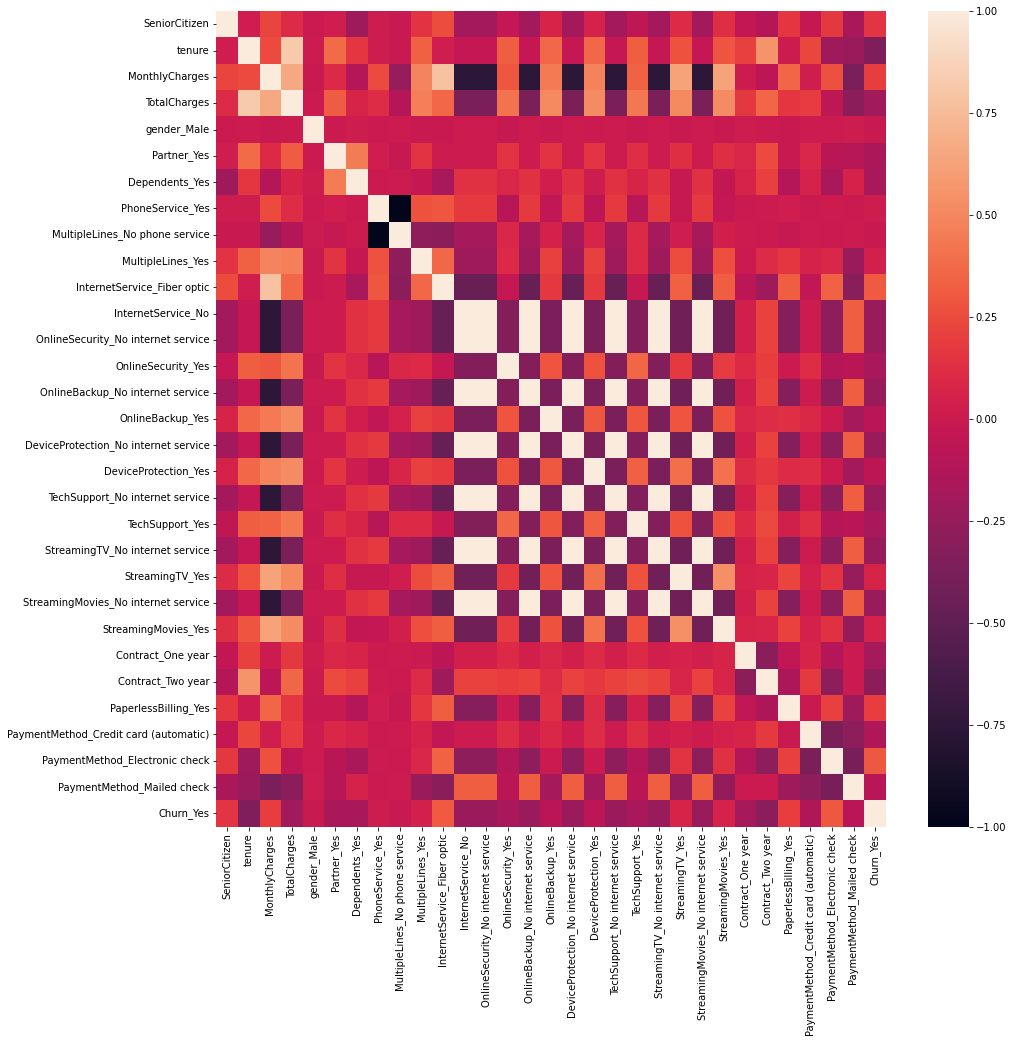

In [41]:
plt.figure(figsize = (15, 15))
sns.heatmap(dataset.corr())
plt.show()

## Quan sát:
1. Dựa trên heatmap, có thể thấy rằng có một mối tương quan mạnh mẽ giữa tổng số phí (TotalCharges) và Tenure trong một dịch vụ. Điều này đúng trong cuộc sống thực bởi vì khách hàng càng ở lại trong một dịch vụ, họ sẽ càng sử dụng cùng một dịch vụ đó cùng với các tính năng hoặc tiện ích bổ sung bổ sung.
2. Cũng có thể thấy rằng những người đã chọn dịch vụ điện thoại từ Telco không chọn nhiều dòng của cùng một dịch vụ. Do đó, chúng tôi biết rằng khách hàng sẵn sàng thêm nhiều dòng của các nhà cung cấp dịch vụ khác nhau thay vì ở lại với cùng một nhà cung cấp dịch vụ điện thoại.
3. Phí hàng tháng có mối tương quan nghịch với việc một người có dịch vụ internet, bảo mật trực tuyến (online security), bảo mật internet sao lưu trực tuyến (online backup internet security), hỗ trợ công nghệ Internet (internet tech support), dịch vụ truyền hình streaming (streaming TV) và dịch vụ phim streaming (streaming movies).
4. Có nhiều xu hướng thú vị khác trong dữ liệu mà chúng ta có thể tìm thấy dựa trên phân tích. Nhưng những quan sát này là quan trọng nhất và chúng có thể được sử dụng nhằm ra quyết định để đảm bảo rằng chúng có được kết quả tốt nhất.